In [1]:
from simple_esn import SimpleESN
import matplotlib.pyplot as plt
import numpy as np
import librosa
import soundfile as sf
import pandas as pd
import scipy.linalg as la
from IPython import display
from sklearn.utils import check_random_state, check_array
import time

import argparse

import seaborn as sns

In [3]:
from IPython.core.display import HTML
style = """
<style>
div.output_wrapper {
    overflow: show;
}
div.output_scroll {
    min-height: 700px;
    overflow: show;
}
div.output_area img {
    max-width: unset;
}
div.output_subarea img {
    max-width: unset;
}
</style>
"""
HTML(style)

4718016

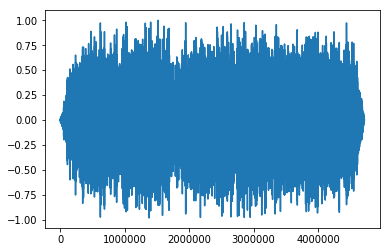

In [4]:
y, sr = librosa.load('VPRYNIMVMT2.wav')
y = y/max(y)
plt.plot(y)
len(y)

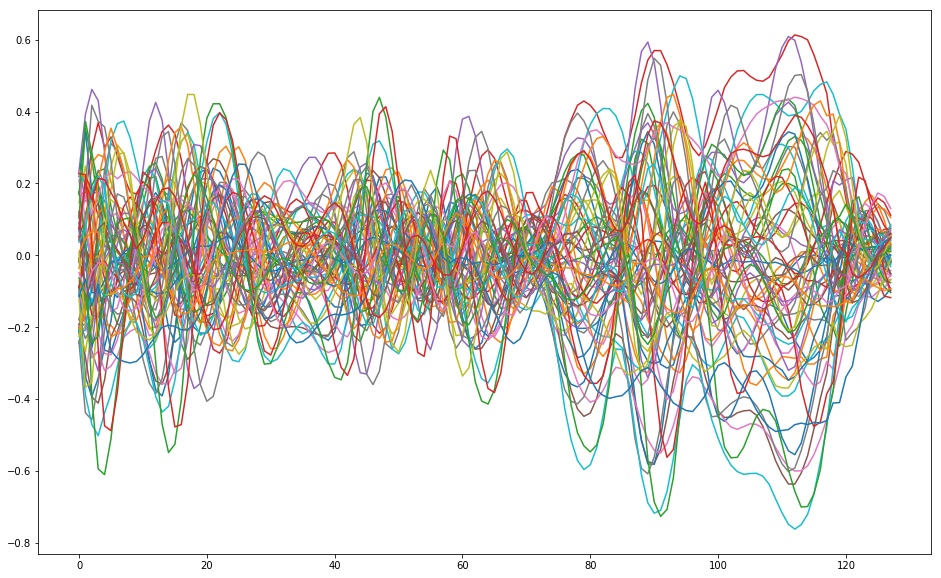

In [4]:
%matplotlib inline
# With animation:

esn = SimpleESN(n_readout=64, 
                n_components=64, 
                n_inputs=1, 
                input_gain=1, 
                input_sparcity=1.2, 
                damping=0.9, 
                weight_scaling=1, 
                sparcity=1.0,
                random_state=31337)


%matplotlib inline
output = []
fig = plt.gcf()
fig.set_size_inches(16,10)
for i in range(118):
    step=[y[i+400000]]
   
    output.append(esn.step(step))
    
    plt.clf()
    plt.ylim(-1,1)
    plt.plot(np.array(output[:]))
    
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.05)

for _ in range(10):
    output.append(esn.step([0]))
    plt.clf()
    plt.plot(np.array(output[:]))
    display.display(plt.gcf())
    
    display.clear_output(wait=True)
    time.sleep(0.05)

0
10
20
30
40
50
60
70
80
90
100
110


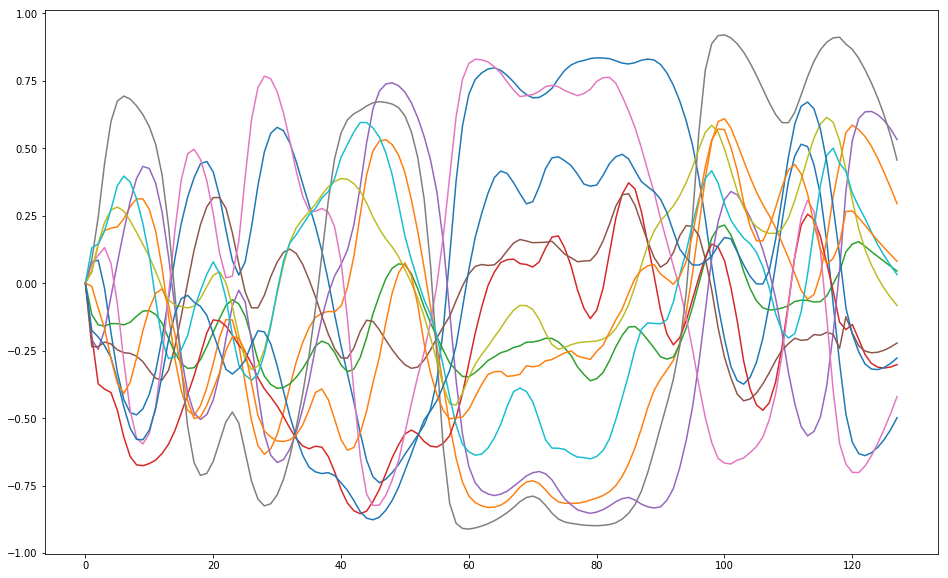

In [13]:
# without animation

esn = SimpleESN(n_readout=12, 
                n_components=12, 
                n_inputs=6, 
                input_gain=2, 
                input_sparcity=.5, 
                damping=0.5, 
                weight_scaling=1.3, 
                sparcity=0.5,
                prune_weights=False,
                random_state=1234)


%matplotlib inline
output = [np.zeros(esn.n_components)]
fig = plt.gcf()
fig.set_size_inches(16,10)
for i in range(118):
    step=[y[i+400000],y[i+450000],y[i+500000],y[i+550000],y[i+600000],y[i+650000]]
    if i % 10 is 0:
        print(i)
   
    output.append(esn.step(step))

# print(len(np.array(output[0:100]).T[0][0]))
    
for j in range(9):
    output.append(esn.step([0,0,0,0,0,0]))
    
plt.clf()

fig.set_size_inches(16,10)
plt.plot(np.array(output))

In [12]:
esn.weights_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.56438267,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.10103718,  0.87453517, -1.21339425,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.23510814,  0.        , -0.83940945,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.09614229,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.96959505, -0.58339659,  0.        ,  0.        ,  0.        ,
        -0.87809703,  

In [12]:
esn.random_state

RandomState(MT19937) at 0x20E7EDBE048